<a href="https://colab.research.google.com/github/Crocellz/Supermarket-sales/blob/main/Outliers_dan_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAMA KELOMPOK :
# Muhamad Nurikbal           : G1A021015
# Rahayu Ningrum Puspa Ridha : G1A021071


In [10]:
#IMPORT LIBRARY YANG DIBUTUHKAN

import pandas as pd
import seaborn as sns
import pandas as pan
import matplotlib.pyplot as plt
import numpy as np
import numpy as num
import statistics

In [18]:
#load menggunakan URL
df = pan.read_csv("https://raw.githubusercontent.com/Crocellz/Supermarket-sales/main/supermarket_sales%20-%20Sheet1.csv")

In [19]:
#Menampilkan 5 record teratas yang telah di load, menggunakan head()
#Data yang digunakan adalah data belanja Konsumen dimana terdapat invoice id, branch, city, dll

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,NaN,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,100.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
#Panjang Dataset

df.shape

(1000, 17)

In [23]:
#Menampilkan informasi column, datatype dan informasi lainnya

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               200 non-null    object 
 1   Branch                   200 non-null    object 
 2   City                     200 non-null    object 
 3   Customer type            200 non-null    object 
 4   Gender                   200 non-null    object 
 5   Product line             200 non-null    object 
 6   Unit price               200 non-null    float64
 7   Quantity                 200 non-null    float64
 8   Tax 5%                   200 non-null    float64
 9   Total                    200 non-null    float64
 10  Date                     200 non-null    object 
 11  Time                     200 non-null    object 
 12  Payment                  200 non-null    object 
 13  cogs                     200 non-null    float64
 14  gross margin percentage  2

In [22]:
#Descriptive statistics

df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,58.321700,6.510000,17.892498,375.742447,357.849950,4.761905,17.892498,7.007000
std,26.446728,7.215972,12.379619,259.972009,247.592389,0.000000,12.379619,1.734906
min,10.960000,1.000000,0.771500,16.201500,15.430000,4.761905,0.771500,4.000000
25%,34.227500,4.000000,7.846375,164.773875,156.927500,4.761905,7.846375,5.600000
50%,58.240000,6.000000,15.386000,323.106000,307.720000,4.761905,15.386000,7.050000
75%,81.467500,8.000000,25.999125,545.981625,519.982500,4.761905,25.999125,8.400000
max,99.960000,100.000000,49.490000,1039.290000,989.800000,4.761905,49.490000,10.000000


In [21]:
#Mengganti missing value menggunakan Mode

df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mode()[0])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,6.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,100.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


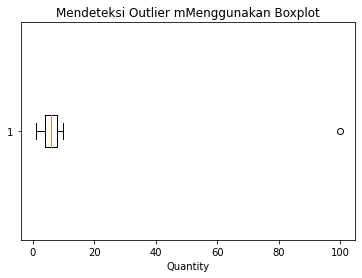

In [24]:
#Menampilkan outliers di baris writing score menggunakan boxplot
sample= df["Quantity"]

plt.boxplot(sample, vert=False)
plt.title("Mendeteksi Outlier mMenggunakan Boxplot")
plt.xlabel('Quantity')
plt.show()

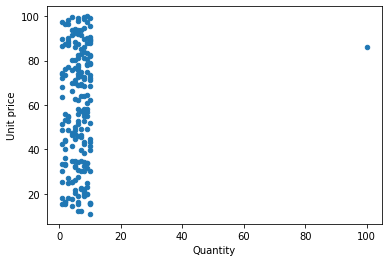

In [27]:
#Mengidentifikasi Outlier menggunakan Scatter plot
#Titik-titik berpencar menjauh ialah Outliers

df.plot(x='Quantity',y='Unit price',kind = 'scatter') 
plt.show()

In [28]:
outliers = []
def detect_outliers_zscore(data):
    theres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > theres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [100.0]


In [30]:
#Mencari nilai kuartil 1, kuartil 3, dan IQR

Q1 = df.Quantity.quantile(0.25)
Q3 = df.Quantity.quantile(0.75)
IQR = Q3 - Q1
print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

nilai_min = np.min(df["Quantity"])
nilai_max = np.max(df["Quantity"])

Kuartil 1 =  4.0
Kuartil 3 =  8.0
IQR =  4.0
IQR minimum =  -2.0
IQR maksimum =  14.0


In [31]:
#Mencari Outlier menggunakan IQR
low_out = []
high_out = []

for i in df["Quantity"]:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : ', low_out)
print('High outlier : ', high_out)

Low outlier :  []
High outlier :  [100.0]


In [32]:
#Menghapus outlier berdasarkan rentang IQR, dan hasil disimpan dalam bingkai data 'df_new'
#Setelah dihapus dataset yang semula (200,5) menjadi (192,5) berarti 8 data telah dihapus

df_new = df[~((df.Quantity < (Q1 - 1.5 * IQR)) | (df.Quantity > (Q3 + 1.5 * IQR)))]
df_new

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,6.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,556-86-3144,C,Naypyitaw,Member,Female,Fashion accessories,74.29,1.0,3.7145,78.0045,1/13/2019,19:30,Cash,74.29,4.761905,3.7145,5.0
196,848-24-9445,C,Naypyitaw,Member,Male,Health and beauty,43.70,2.0,4.3700,91.7700,3/26/2019,18:03,Cash,87.40,4.761905,4.3700,4.9
197,856-22-8149,A,Yangon,Normal,Female,Home and lifestyle,25.29,1.0,1.2645,26.5545,3/23/2019,10:13,Ewallet,25.29,4.761905,1.2645,6.1
198,699-01-4164,C,Naypyitaw,Normal,Male,Health and beauty,41.50,4.0,8.3000,174.3000,3/12/2019,19:58,Credit card,166.00,4.761905,8.3000,8.2


In [33]:
#Menentukan flooring and capping

tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("New array:",b)

2.0 10.0
New array: [ 7.  6.  7.  8. 10.  7.  6. 10.  2.  3.  4.  4.  5. 10. 10.  6.  7.  6.
  3.  2.  5.  3.  2.  5.  3.  8.  2.  2.  5.  9.  5.  9.  8.  2.  4.  2.
  5.  9.  8.  8.  2.  2.  6.  8.  2.  4.  9.  9.  6. 10.  7.  5.  4.  2.
  2.  8.  2.  8. 10.  6.  3.  6.  9. 10.  4. 10.  2.  6. 10.  2. 10. 10.
  3.  6.  9. 10.  9.  9. 10.  5.  6.  3.  8.  4.  5.  7.  5.  7.  2.  6.
  4. 10.  7.  9.  2.  2. 10.  6.  3.  6.  2.  9.  9.  6.  7. 10.  6.  6.
  9. 10.  2.  3.  7.  9.  9.  3.  5.  2. 10.  2.  8.  7.  9.  8.  8.  7.
  5.  9.  8.  9.  7.  6.  4.  6.  6.  3.  5.  6. 10.  8. 10. 10. 10.  2.
  6.  6. 10.  4.  8.  8.  4.  7.  9.  6.  8.  5.  2.  5.  9.  6.  8.  2.
  7.  2. 10.  8. 10. 10.  6.  7.  5.  5.  8.  6.  8.  9.  8.  7.  6.  3.
  7.  8. 10.  8.  7.  3.  8.  4.  2.  4.  3.  2.  9.  4.  5.  2.  2.  2.
  4.  5.]


In [34]:
#Mengganti Nilai Outlier Menggunakan Imputation (median)

median = np.median(sample)
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)

Sample:  0        7.0
1        6.0
2        7.0
3        8.0
4      100.0
       ...  
195      1.0
196      2.0
197      1.0
198      4.0
199      5.0
Name: Quantity, Length: 200, dtype: float64
New array:  [ 7.  6.  7.  8. 14.  7.  6. 10.  2.  3.  4.  4.  5. 10. 10.  6.  7.  6.
  3.  2.  5.  3.  2.  5.  3.  8.  1.  2.  5.  9.  5.  9.  8.  2.  4.  1.
  5.  9.  8.  8.  1.  2.  6.  8.  2.  4.  9.  9.  6. 10.  7.  5.  4.  1.
  2.  8.  2.  8. 10.  6.  3.  6.  9. 10.  4. 10.  2.  6. 10.  1. 10. 10.
  3.  6.  9. 10.  9.  9. 10.  5.  6.  3.  8.  4.  5.  7.  5.  7.  1.  6.
  4. 10.  7.  9.  1.  1. 10.  6.  3.  6.  1.  9.  9.  6.  7. 10.  6.  6.
  9. 10.  2.  3.  7.  9.  9.  3.  5.  1. 10.  2.  8.  7.  9.  8.  8.  7.
  5.  9.  8.  9.  7.  6.  4.  6.  6.  3.  5.  6. 10.  8. 10. 10. 10.  1.
  6.  6. 10.  4.  8.  8.  4.  7.  9.  6.  8.  5.  1.  5.  9.  6.  8.  1.
  7.  2. 10.  8. 10. 10.  6.  7.  5.  5.  8.  6.  8.  9.  8.  7.  6.  3.
  7.  8. 10.  8.  7.  3.  8.  4.  1.  4.  3.  2.  9.  4.  5.  

In [35]:
#Mengganti Nilai Outlier Menggunakan Imputation (mean)

mean = np.mean(sample)
for i in sample_outliers:
    c = np.where(sample==i, 14,sample)
print("Sample: ", sample)
print("New array: ",c)

Sample:  0        7.0
1        6.0
2        7.0
3        8.0
4      100.0
       ...  
195      1.0
196      2.0
197      1.0
198      4.0
199      5.0
Name: Quantity, Length: 200, dtype: float64
New array:  [ 7.  6.  7.  8. 14.  7.  6. 10.  2.  3.  4.  4.  5. 10. 10.  6.  7.  6.
  3.  2.  5.  3.  2.  5.  3.  8.  1.  2.  5.  9.  5.  9.  8.  2.  4.  1.
  5.  9.  8.  8.  1.  2.  6.  8.  2.  4.  9.  9.  6. 10.  7.  5.  4.  1.
  2.  8.  2.  8. 10.  6.  3.  6.  9. 10.  4. 10.  2.  6. 10.  1. 10. 10.
  3.  6.  9. 10.  9.  9. 10.  5.  6.  3.  8.  4.  5.  7.  5.  7.  1.  6.
  4. 10.  7.  9.  1.  1. 10.  6.  3.  6.  1.  9.  9.  6.  7. 10.  6.  6.
  9. 10.  2.  3.  7.  9.  9.  3.  5.  1. 10.  2.  8.  7.  9.  8.  8.  7.
  5.  9.  8.  9.  7.  6.  4.  6.  6.  3.  5.  6. 10.  8. 10. 10. 10.  1.
  6.  6. 10.  4.  8.  8.  4.  7.  9.  6.  8.  5.  1.  5.  9.  6.  8.  1.
  7.  2. 10.  8. 10. 10.  6.  7.  5.  5.  8.  6.  8.  9.  8.  7.  6.  3.
  7.  8. 10.  8.  7.  3.  8.  4.  1.  4.  3.  2.  9.  4.  5.  

Text(0.5, 0, 'Quantity')

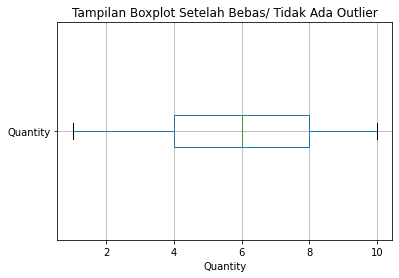

In [36]:
#Menampilkan boxplot yang telah bebas dari outliers 

df_new.boxplot(["Quantity"],vert=False)
plt.title("Tampilan Boxplot Setelah Bebas/ Tidak Ada Outlier")
plt.xlabel("Quantity")

In [37]:
#Menemukan korelasi antara variabel numerik

df.select_dtypes(['float64' , 'int64']).corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.096828,0.694651,0.694651,0.694651,NaN,0.694651,0.021953
Quantity,0.096828,1.000000,0.338172,0.338172,0.338172,NaN,0.338172,-0.016624
Tax 5%,0.694651,0.338172,1.000000,1.000000,1.000000,NaN,1.000000,0.078626
Total,0.694651,0.338172,1.000000,1.000000,1.000000,NaN,1.000000,0.078626
cogs,0.694651,0.338172,1.000000,1.000000,1.000000,NaN,1.000000,0.078626
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.694651,0.338172,1.000000,1.000000,1.000000,NaN,1.000000,0.078626
Rating,0.021953,-0.016624,0.078626,0.078626,0.078626,NaN,0.078626,1.000000


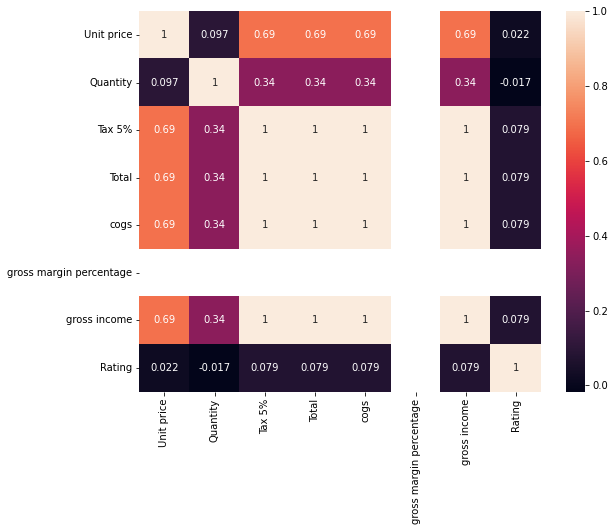

In [38]:
#Menampilan korelasi menggunakan heatmap, jika semakin pekat warnannya, maka korelasinya akan semakin kuat

plt = plt.figure(figsize=(9,7)) 
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(), annot=True) 
plt.show()